# STEP 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define constants (Assume the values are given or you can replace them with actual values)
V_rated_ClassX = 11.4  # example value
R_ClassX = 89.15         # example value
I_rated_ClassX = 0.16  # example value
I_rated_ClassY = 0.14 # example value

# # Define the system of equations
# def equations(vars):
#     R_ClassY, V_rated_ClassY = vars
    
#     eq1 = R_ClassY - ((V_rated_ClassX * (1 + 2 * I_rated_ClassX)) / (V_rated_ClassY * (1 + 2 * I_rated_ClassY)))**(2/3) * R_ClassX
#     eq2 = V_rated_ClassY - (R_ClassX / R_ClassY)**(2/3) * V_rated_ClassX
    
#     return [eq1, eq2]

# # Initial guess for the values of R_ClassY and V_rated_ClassY
# initial_guess = [50, 100]  # Replace with appropriate guesses

# # Solve the system of equations
# solution = fsolve(equations, initial_guess)

# R_ClassY, V_rated_ClassY = solution

# # Print the results
# print(f"R_ClassY: {R_ClassY}")
# print(f"V_rated_ClassY: {V_rated_ClassY}")

In [11]:
# TSR_old = 8.0

# Define the values for the my design!
R_ClassY = 91.5 # [m]
# V_rated_ClassY = 

# omega_old_rated = TSR_old*V_rated_ClassX/R_ClassX

# TSR_new = omega_old_rated*R_ClassY/V_rated_ClassY

# V_tip_old = omega_old_rated*R_ClassX

# omega_new_rated = TSR_new*V_rated_ClassY/R_ClassY


# V_tip_new = omega_new_rated*R_ClassY


# print(f"V_tip_old = {V_tip_old}")
# print(f"V_tip_new = {V_tip_new}")

# Read the twist distributions
r_twist_BB_neo, twist_BB_neo = np.loadtxt('twist_BB_neo.txt').T
r_twist_dtu_10mw, twist_dtu_10mw = np.loadtxt('twist_dtu_10mw.txt').T

1.0272148233931673 1.0263600673022995
86.366 88.71643543717428


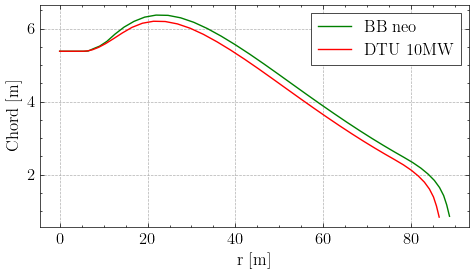

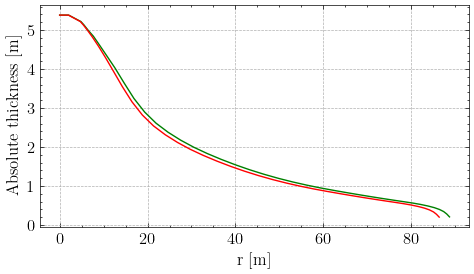

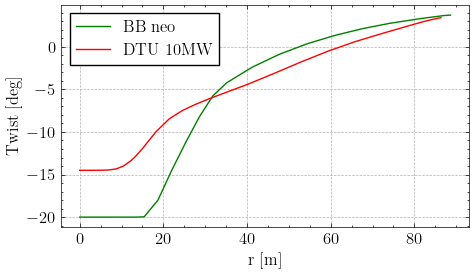

In [12]:
from pathlib import Path 
import scienceplots
import matplotlib

# matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use('science')

# # Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'normal'

current_dir = Path.cwd()

DTU_10MW_RWT_ae = current_dir.parent / "dtu_10mw/data/DTU_10MW_RWT_ae.dat"  # THIS IS ACTUAL DTU

data = np.loadtxt(DTU_10MW_RWT_ae, skiprows=2, usecols=(0, 1, 2))

r_array_old = data[:, 0]
chord_array_old = data[:, 1]
rel_thickness_array_old = data[:, 2]

# print(r_array_old, chord_array_old, rel_thickness_array_old)

Hub_radius = 2.8

scale_ratio_blade = (R_ClassY-Hub_radius) / (R_ClassX-Hub_radius)
scale_ratio_rotor = (R_ClassY) / (R_ClassX)
print(scale_ratio_blade, scale_ratio_rotor)

r_array_new = r_array_old * (scale_ratio_blade)
print(np.max(r_array_old), np.max(r_array_new))
chord_array_new = chord_array_old * (scale_ratio_blade)

chord_array_new[:4] = 5.38 # cylinder
chord_array_new[4] = 5.386 # cylinder
chord_array_new[5] = 5.45 #this is just to smooth the shape of the blade
chord_array_new[6] = 5.52 #this is just to smooth the shape of the blade
chord_array_new[7] = 5.65 #this is just to smooth the shape of the blade
chord_array_new[8] = 5.85 #this is just to smooth the shape of the blade


# print(r_array_new, chord_array_new)

figure = plt.figure(figsize=(5, 3))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.plot(r_array_new, chord_array_new, label="BB neo", c='green')
plt.plot(r_array_old, chord_array_old, label="DTU 10MW", c='red')
plt.xlabel("r [m]")
plt.ylabel("Chord [m]")
plt.grid(linewidth=0.5, linestyle='--')
legend = plt.legend(fancybox=False, edgecolor="black")
legend.get_frame().set_linewidth(0.5)
plt.tight_layout()
figure.savefig("plots/Chord.pdf", dpi = 300, bbox_inches = 'tight')

abs_thickness_array_old = chord_array_old * rel_thickness_array_old/100
abs_thickness_array_new = chord_array_new * rel_thickness_array_old/100

figure = plt.figure(figsize=(5, 3))
plt.plot(r_array_new, abs_thickness_array_new, label="New design", c='green')
plt.plot(r_array_old, abs_thickness_array_old, label="Old design", c='red')
plt.xlabel("r [m]")
plt.ylabel("Absolute thickness [m]")
plt.grid(linewidth=0.5, linestyle='--')
plt.tight_layout()
figure.savefig("plots/Absolute_thickness.pdf", dpi = 300, bbox_inches = 'tight')

figure = plt.figure(figsize=(5, 3))
plt.plot(r_twist_BB_neo, twist_BB_neo, label="BB neo", c='green')
plt.plot(r_twist_dtu_10mw, twist_dtu_10mw, label="DTU 10MW", c='red')
plt.xlabel("r [m]")
plt.ylabel("Twist [deg]")
plt.grid(linewidth=0.5, linestyle='--')
plt.tight_layout()
plt.legend()
figure.savefig("plots/twist.pdf", dpi = 300, bbox_inches = 'tight')


# print(np.max(chord_array_new), np.max(chord_array_old))

plt.show()